Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5806 - loss: 0.6672 - val_accuracy: 0.6425 - val_loss: 0.6300
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.6365 - val_accuracy: 0.6587 - val_loss: 0.6183
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.6343 - val_accuracy: 0.6522 - val_loss: 0.6138
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6551 - loss: 0.6212 - val_accuracy: 0.6642 - val_loss: 0.6096
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6616 - loss: 0.6125 - val_accuracy: 0.6679 - val_loss: 0.5966
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.6060 - val_accuracy: 0.6757 - val_loss: 0.5973
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.5994 - val_accuracy: 0.6757 - val_loss: 0.5848
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.5987 - val_accuracy: 0.6757 - val_loss:

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.3923 - val_accuracy: 0.8326 - val_loss: 0.3290
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.3789 - val_accuracy: 0.8312 - val_loss: 0.3259
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.3778 - val_accuracy: 0.8326 - val_loss: 0.3217
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8215 - loss: 0.3595 - val_accuracy: 0.8316 - val_loss: 0.3187
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.3641 - val_accuracy: 0.8312 - val_loss: 0.3177
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8139 - loss: 0.3633 - val_accuracy: 0.8399 - val_loss: 0.3121
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.3592 - val_accuracy: 0.8399 - val_loss: 0.3100
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 0.3515 - val_accuracy: 0.8413 - v

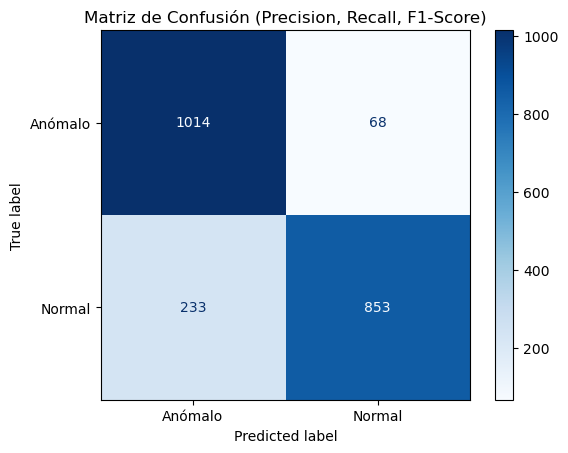

In [355]:
# Precisión, Recall y F1-Score

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna Recall basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Recall'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['Recall']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo con un ajuste para priorizar la clase Anómalo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Calcular métricas de precisión, recall y F1-score
precision = precision_score(y_test_classes, y_pred_classes, average=None)
recall = recall_score(y_test_classes, y_pred_classes, average=None)
f1 = f1_score(y_test_classes, y_pred_classes, average=None)

print("Precision por clase:", precision)
print("Recall por clase:", recall)
print("F1-Score por clase:", f1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Precision, Recall, F1-Score)')
plt.show()


In [356]:
data.tail(5)


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,catalogoSVM3,catalogoSVM4,catalogoRamdomF,catalogoRamdomF2,crossValidation,RedesNeuronales,RedesNeuronales3,RedesNeuronalesSmote,matriz,Recall
3903,6155,SMARTWATCH NM-PLUS BT,1,IVA 21,relojes digitales para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
3904,6156,ETHERNET ADAPTADOR STARLINK,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,95,PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
3905,6157,PIZARRA BLANCA MARCO ALUMINIO,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
3906,6158,BORRADOR DE PIZARRA CON 3 MARCADORES,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
3907,6159,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
